* 신용카드 이상감지 모델을 만들기 위한 데이터이며, is_fraud가 사기거래 여부를 나타내는 변수입니다.
* 최종적으로 사기거래 여부를 예측하기 위한 데이터를 준비해보세요.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('fraud.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  float64
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [3]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706014e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038740e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131120e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653880e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956830e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


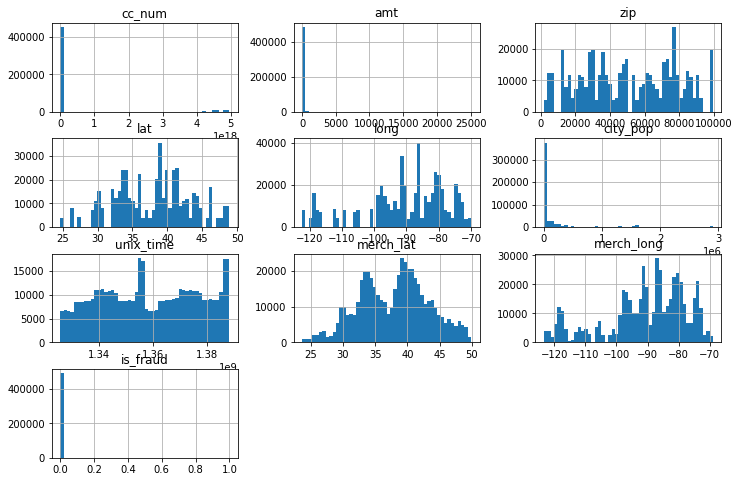

In [4]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12,8))
plt.show()
# 아래 분포들로부터 알 수 있는 점들: 변수들의 스케일이 서로 많이 다름. 그리고 거래 금액인 'amt' 히스토그램에서 분포가 한쪽으로 많이 치우쳐져 있음.  

In [5]:
df['amt'].sort_values()
# 'amt' 값에서 이상치 있는지 확인함. 이상치는 없는 것으로 확인됨

258861        1.00
254027        1.00
469101        1.00
257652        1.00
172571        1.00
            ...   
43412     14630.68
198719    15047.03
410031    16837.08
49446     17897.24
93045     25086.94
Name: amt, Length: 491134, dtype: float64

In [6]:
# 최소 2개 이상의 새로운 피처(변수)를 생성해봅시다.
# [힌트] 구매 금액, 시간 등의 변수를 이용할 수 있습니다.
# 새로운 피처 생성: 거래 금액의 로그 값을 생성함
df['log_amt'] = np.log(df['amt'] + 1)

In [7]:
corr_matrix = df.corr()

In [8]:
corr_matrix["is_fraud"].sort_values(ascending=False)

is_fraud      1.000000
amt           0.128526
log_amt       0.071859
long          0.002771
merch_long    0.002715
merch_lat     0.000915
lat           0.000827
cc_num        0.000386
zip          -0.003005
city_pop     -0.005630
unix_time    -0.008156
Name: is_fraud, dtype: float64

In [9]:
# 'dob'를 연령로 변환
from datetime import datetime

df['dob'] = pd.to_datetime(df['dob'])
current_year = datetime.now().year
df['age'] = current_year - df['dob'].dt.year

In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
#'trans_date_trans_time' 컬럼에서 시간 정보를 추출하여 새로운 'hour' 컬럼을 생성함

In [11]:
# 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거합니다.
df = df.drop(['first', 'last', 'street', 'trans_num','trans_date_trans_time', 'dob'], axis=1)
# 'first', 'last', 'street', 'trans_num' 컬럼을 제거하는 이유: 
# 이름 정보는 개인 식별에 필요한 정보이지, 사기 거래 패턴을 분석하는 데는 유의미하지 않다고 판단함
# 거리 정보는 사기 거래와 어느 정도 관련이 있을 수 있지만, 일반적으로 시(city)나 주(state) 정보로 충분히 반영할 수 있음
# 거래 번호는 각 거래를 고유하게 식별하기 위한 정보로, 사기 거래 여부와는 직접적인 관련이 없음
# 거래 일시는 'hour'로 정보 추출함
# 생년월일은 개인 식별 정보로 '연령'으로 정보 추출함

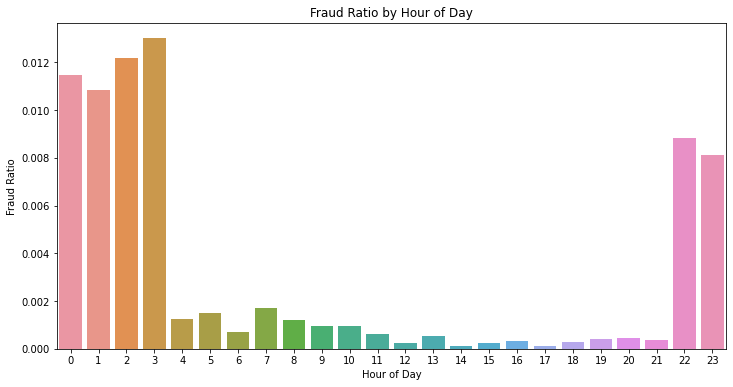

In [12]:
# 시간대별 거래 수와 사기 거래 수를 계산
hourly_counts = df.groupby('hour').size()
fraud_counts = df[df['is_fraud'] == 1].groupby('hour').size()

# 시간대별 사기 거래 비율을 계산
fraud_ratio = fraud_counts / hourly_counts

# 데이터프레임으로 정리
fraud_ratio_df = fraud_ratio.reset_index(name='fraud_ratio').fillna(0)

# 시간대별 사기 거래 비율 시각화
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='fraud_ratio', data=fraud_ratio_df)
plt.title('Fraud Ratio by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Ratio')
plt.show()

# 시각화로부터 도출할 수 있는 점들:
# 사기 거래는 22시~3시인 늦은 저녁 시간대와 이른 새벽 사이에 많이 일어남

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text

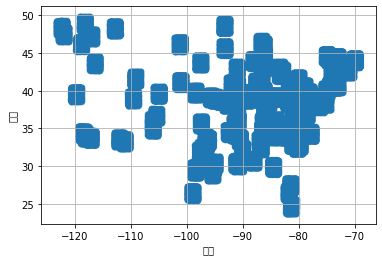

In [13]:
# 데이터의 위도/경도 정보를 활용해볼 수 있을까요?
# 통계적 관점으로 접근하여 유용한 변수를 만들어낼 수 있을까요?
df.plot(kind="scatter",x="merch_long", y="merch_lat", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()
# 경도와 위도간 상관관계가 높아보이지는 않음

In [14]:
df.isnull().mean()
# 결측치는 없음

cc_num        0.0
merchant      0.0
category      0.0
amt           0.0
gender        0.0
city          0.0
state         0.0
zip           0.0
lat           0.0
long          0.0
city_pop      0.0
job           0.0
unix_time     0.0
merch_lat     0.0
merch_long    0.0
is_fraud      0.0
log_amt       0.0
age           0.0
hour          0.0
dtype: float64

In [15]:
df.dtypes

cc_num        float64
merchant       object
category       object
amt           float64
gender         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
log_amt       float64
age             int64
hour            int64
dtype: object

In [16]:
# 범주형 변수 선택
categorical_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']

In [ ]:
# OneHotEncoder 적용 
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical = onehot_encoder.fit_transform(df[categorical_cols])

In [ ]:
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out(categorical_cols))
encoded_categorical_df.reset_index(drop=True, inplace=True)

In [ ]:
# 원본 데이터에서 범주형 변수 제거 후 인코딩된 변수 추가
df_encoded = pd.concat([df.drop(categorical_cols, axis=1).reset_index(drop=True), encoded_categorical_df], axis=1)

print(df_encoded.head())

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_encoded_scaled = std_scaler.fit_transform(df_encoded.drop('is_fraud', axis=1))

print(df_encoded_scaled[:5])

# 스케일의 범위를 같게 만들어주기 위해 표준화 진행함

In [ ]:
# 회고
# 변수들간 스케일이 서로 많이 다르고 아직 제가 인사이트가 부족해서 그런지, 결과를 다양하게 도출해내지 못 한거 같습니다. 그리고 원핫인코딩을 잘 몰라서 어려웠습니다.